## Python Practice
A recreation of [Randal S. Olson's An Example Machine Learning Notebook](http://nbviewer.jupyter.org/github/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb)

In [3]:
#import .csv, check data set
import pandas as pd

iris_data = pd.read_csv('/Users/sanemkabaca/Documents/Personal/Training/Python/ipython_practice/iris-data.csv')
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#treat anything with NA as a missing value
iris_data = pd.read_csv('iris-data.csv', na_values = ['NA'])

In [5]:
#print some summary statistics
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#set up notebook to show plots
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

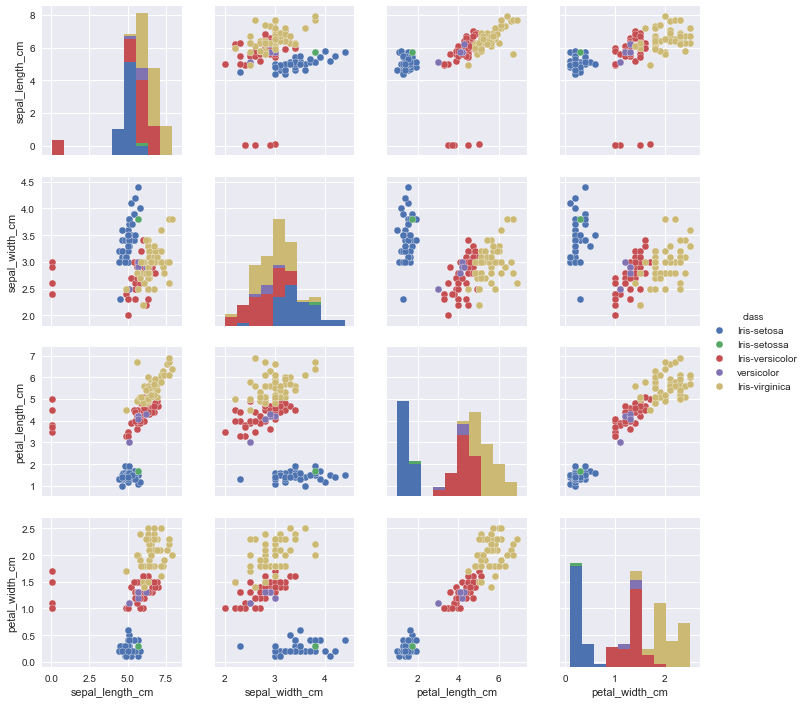

In [7]:
#scatterplot matrix to plot distribution of each column along
#diagonal and scatterplot matrix for each combo of variables
#also drop na's
sb.pairplot(iris_data.dropna(), hue='class')

In [8]:
##Flower class coding error; recode into appropriate class
##loc looks at the labels -- so in this dataframe, fix where the label for class is 'versicolor' in column 'class'
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

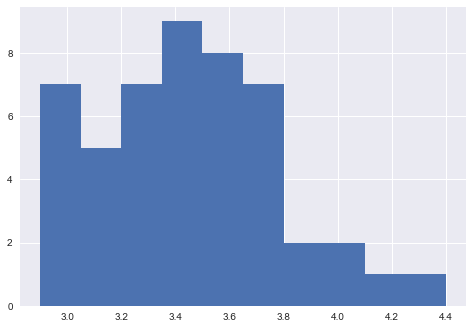

In [9]:
##Outliers
#Recreate df which only keeps iris-setosa rows with a sepal width more than 2.5cm
#Plot a histogram of IS and sepal width
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

In [10]:
##see what's going on with the 5 entries where the sepal length is nearly 0cm
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
             (iris_data['sepal_length_cm'] < 1.0)]

##plot twist: sepal length was accidentally measured in meters -- need to multiply by 100

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


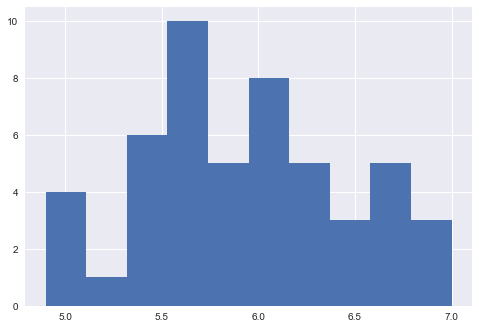

In [12]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
             (iris_data['sepal_length_cm'] < 1.0),
             'sepal_length_cm'] *= 100.0

iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

In [17]:
##instead of dropping nulls, fill with mean lengths
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


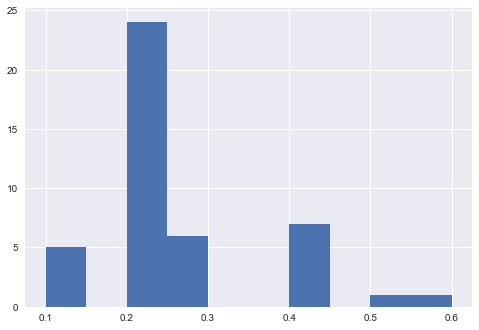

In [15]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()

In [16]:
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


In [18]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [19]:
iris_data.to_csv('iris-data-clean.csv', index=False)

iris_data_clean = pd.read_csv('iris-data-clean.csv')

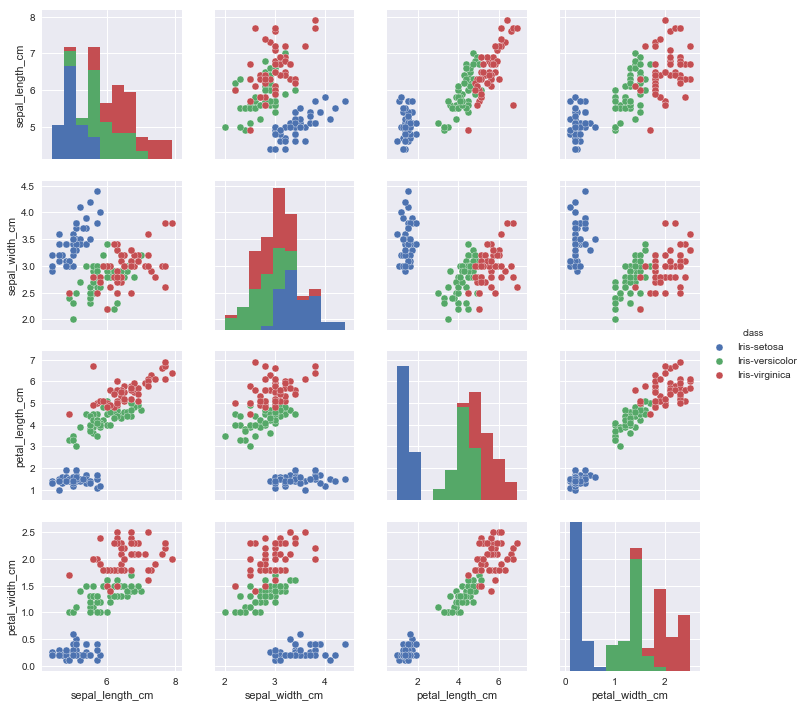

In [20]:
sb.pairplot(iris_data_clean, hue='class')

In [22]:
#test data to make sure it's clean
#1. we know there should only be 3 classes
assert len(iris_data_clean['class'].unique()) == 3

In [23]:
#2. sepal lengths should never be below 2.5cm for iris versicolor
assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

In [24]:
#3. ensure no missing
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0

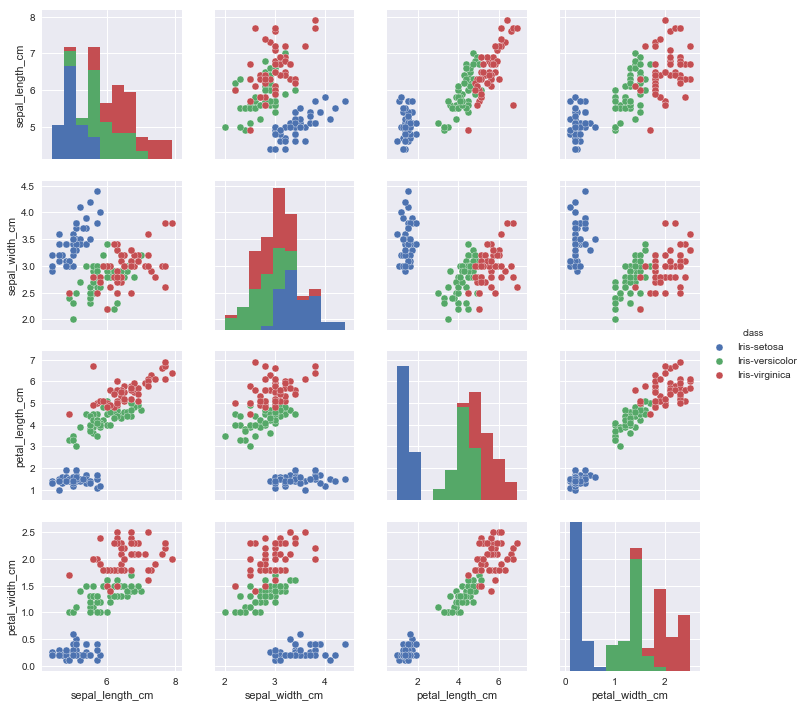

In [27]:
sb.pairplot(iris_data_clean, hue = 'class')
#classification will be easy based on petal length to distinguish
#iris-setosa, the other two will be more difficult
#also, there's a correlation between sepal length and width

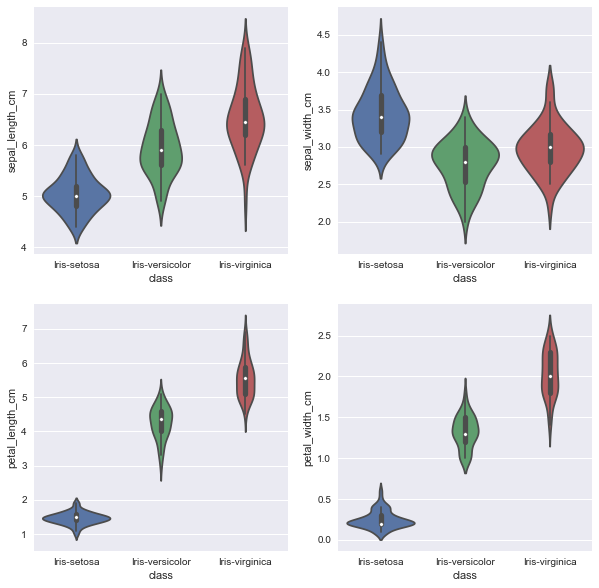

In [34]:
#violin plots are like box plots but scale the box according to
#density of data. LOOP!
plt.figure(figsize=(10, 10)) #image size

for column_index, column in enumerate(iris_data_clean.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='class', y=column, data=iris_data_clean)

In [36]:
#time to test
iris_data_clean = pd.read_csv('iris-data-clean.csv')
#all 4 measurements are used as inputs
all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values
all_classes = iris_data_clean['class'].values

all_inputs[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [37]:
from sklearn.cross_validation import train_test_split
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75, random_state=1)

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
from sklearn.tree import DecisionTreeClassifier

#creat classifier
decision_tree_classifier = DecisionTreeClassifier()

#train classifier on training set
decision_tree_classifier.fit(training_inputs, training_classes)

#validate the classifier on testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.97368421052631582

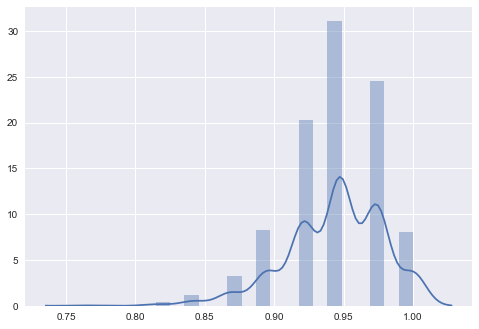

In [39]:
#model achieves 97% classification accuracy
#but this can vary depending on how the training and testing sets
#were split

model_accuracies = []

for reptition in range (1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
sb.distplot(model_accuracies)

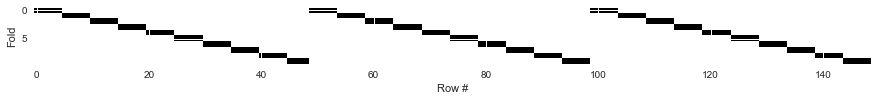

In [44]:
##variation shows and example of the model overfitting. This is why most data scientists perform k-fold cross
#validation on models. Split the original data into k subsets, use one as a testing set and the rest are training sets
#repeated k times so that each subset is used as a testing set exactly once

#10-fold is most common -- each square is an entry in our data set
import numpy as np
from sklearn.cross_validation import StratifiedKFold

def plot_cv(cv, n_samples):
    masks = []
    for train, test in cv:
        mask = np.zeros(n_samples, dtype=bool)
        mask[test] = 1
        masks.append(mask)
        
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(all_classes, n_folds=10), len(all_classes))

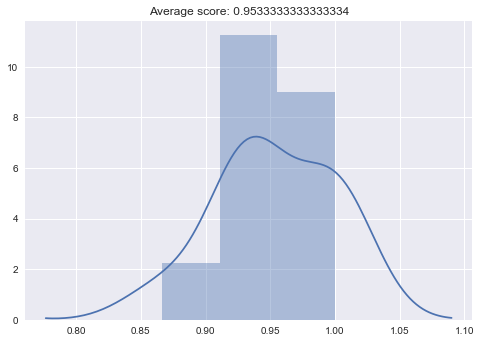

In [45]:
#crossvalidation to estimate classifier's performance
from sklearn.cross_validation import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

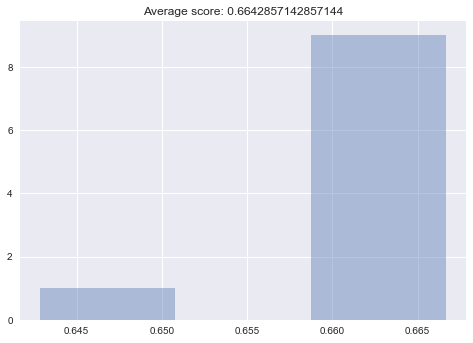

In [46]:
#limiting the depth affects the accuracy where depth is the # of layers
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores, kde=False)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [50]:
#Grid Search: Explore a range of parameters and find the best-performing parameter combination. Focus search on
#the best range of parameters, then repeat several times until the best parameters are discovered.

#tune decision tree classifier and use two parameters for now

from sklearn.grid_search import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid = parameter_grid,
                           cv = cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9664429530201343
Best parameters: {'max_depth': 3, 'max_features': 3}


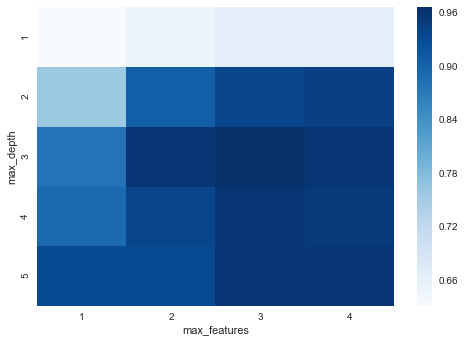

In [51]:
grid_visualization = []

for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap = 'Blues')
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features') #number of columns to include
plt.ylabel('max_depth') #number of layers down into decision tree to go

In [52]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=3, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
import sklearn.tree as tree
from sklearn.externals.six import StringIO

with open('iris_dtc.dot', 'w') as out_file:
    outfile = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

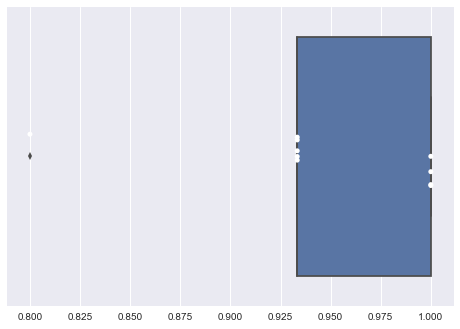

In [55]:
dt_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)

sb.boxplot(dt_scores)
sb.stripplot(dt_scores, jitter=True, color='white')

In [58]:
##random forest classifiers work by creating many different decision trees trained on random subsets of training samples
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [5, 10, 25, 50],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4],
                  'warm_start': [True, False]}

cross_validation = StratifiedKFold(all_classes, n_folds = 10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid = parameter_grid, 
                           cv = cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best paramters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.9664429530201343
Best paramters: {'criterion': 'gini', 'max_features': 2, 'n_estimators': 25, 'warm_start': False}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=25, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

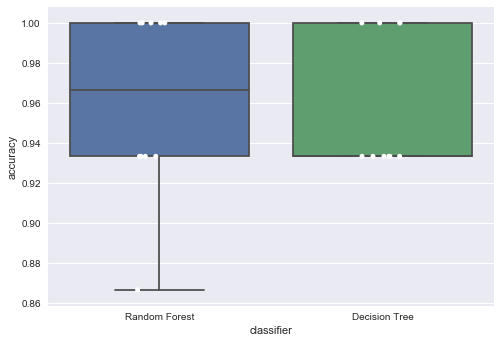

In [59]:
#compare performance of random forest and decisiont ree

random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_inputs, all_classes, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sb.boxplot(x='classifier', y='accuracy', data=both_df)
sb.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='white')